In [1]:
from chessnet.notebook_config import *

In [21]:
dfs = {
    "OTB": pd.read_csv(ARTIFACTS_DIR / f"{Database.OTB}.csv"),
    "Portal": pd.read_csv(ARTIFACTS_DIR / f"{Database.Portal}.csv"),
}

In [31]:
games_per_player_dict = {}
for i, (name, df) in enumerate(dfs.items()):
    players = pd.concat([
        df[["White"]].dropna().rename(columns={"White": "Player"}),
        df[["Black"]].dropna().rename(columns={"Black": "Player"}),
    ])
    counts = players.value_counts()
    games_per_player = counts.values
    games_per_player_dict[name] = games_per_player

In [22]:
def plot_game_distribution(data, ax=None, **kwargs):
    if ax is None:
        _, ax = plt.subplots()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Cantidad de partidas")
    ax.set_ylabel("Frecuencia")
    # Log scale
    bins = np.logspace(np.log10(min(data)), np.log10(max(data)+1), 20)
    freq, _ = np.histogram(data, bins=bins, density=True)
    X_log, Y_log = bins[:-1], freq

    Y_pred, slope, y_err = linear_regression(X_log[:-3], Y_log[:-3])
    c = Y_log[5] / X_log[5]**slope
    #label = r'$\gamma = {{{:.2f}}}({{{:.0f}}})$'.format(slope, 100*y_err)
    label = r'${{{:.2f}}}({{{:.0f}}})$'.format(slope, 100*y_err)
    #ax.text(0.45, 0.73, label, fontsize=26, transform=ax.transAxes)
    ax.text(0.28, 0.5, r"$\gamma = -1.5$", fontsize=26, transform=ax.transAxes)
    #ax.plot(
    #    X_log, powerlaw(X_log, slope, c), "--", color="k", zorder=10, #label=label,
    #)

    #X_powerlaw = X_log
    X_powerlaw = np.array([1, 10000])
    ax.plot(
        X_powerlaw, powerlaw(X_powerlaw, -1.5, c), "--", color="k", zorder=10, #label=label,
    )

    # Lin scale
    bins = range(1, max(data)+1)
    freq, _ = np.histogram(data, bins=bins, density=True)
    X_lin, Y_lin = bins[:-1], freq

    ax.plot(
        X_lin,
        Y_lin,
        ".",
        color="gray",
        alpha=0.5,
        fillstyle="none",
        label="Bineado lineal"
    )
    color = kwargs.get("color")
    ax.plot(
        X_log,
        Y_log,
        "o",
        markersize=10,
        color=color,
        label="Bineado logarítmico"
    )
    return ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


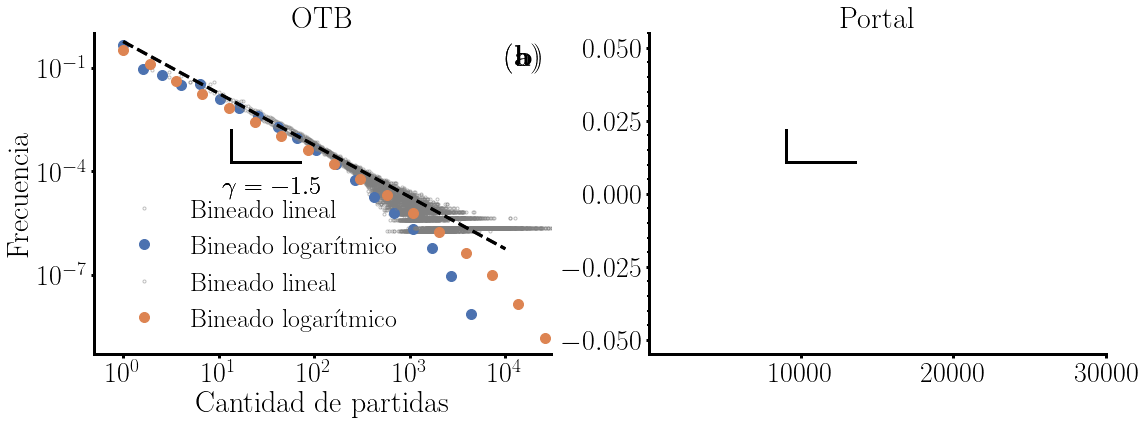

In [37]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
for ax in axes.flatten():
    ax.set_xlim(0.5, 30000)
axes[0].set_title(database_latex["OTB"], fontsize=30)
axes[1].set_title(database_latex["Portal"], fontsize=30)
axes[0].plot([0.3, 0.45], [0.6, 0.6], "-", color="k", transform=axes[0].transAxes)
axes[0].plot([0.3, 0.3], [0.6, 0.7], "-", color="k", transform=axes[0].transAxes)
axes[1].plot([0.3, 0.45], [0.6, 0.6], "-", color="k", transform=axes[1].transAxes)
axes[1].plot([0.3, 0.3], [0.6, 0.7], "-", color="k", transform=axes[1].transAxes)
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[0]
    ax.text(0.9, 0.9, panels[i], fontsize=30, transform=ax.transAxes)
    games_per_player = games_per_player_dict[name]
    plot_game_distribution(games_per_player, ax=ax, color=f"C{i}")
    ax.set_xticks([1, 10, 100, 1000, 10000])
    ax.set_ylim(5e-10, 1)

axes[0].legend(frameon=False)
axes[1].legend(frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig(FIGS_DIR / "game_distribution.pdf")
plt.show()

In [68]:
def plot_game_distribution(data, ax=None, **kwargs):
    if ax is None:
        _, ax = plt.subplots()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Cantidad de partidas")
    ax.set_ylabel("Frecuencia")
    # Log scale
    bins = np.logspace(np.log10(min(data)), np.log10(max(data)+1), 35)
    freq, _ = np.histogram(data, bins=bins, density=True)
    X_log, Y_log = bins[:-1], freq
    mask = ~np.isnan(Y_log)
    mask = Y_log>1e-10
    X_log, Y_log = X_log[mask], Y_log[mask]
    ax.plot(
        X_log,
        Y_log,
        markersize=8,
        color=kwargs.get("color"),
        label=kwargs.get("label"),
        marker=kwargs.get("marker"),
        fillstyle="none",
    )
    return ax

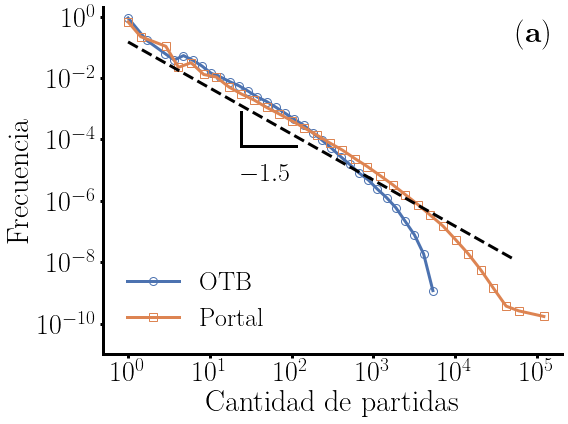

In [76]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax.set_xlim(0.5, 200000)
ax.text(0.9, 0.9, panels[0], fontsize=30, transform=ax.transAxes)
ax.plot([0.3, 0.42], [0.6, 0.6], "-", color="k", transform=ax.transAxes)
ax.plot([0.3, 0.3], [0.6, 0.7], "-", color="k", transform=ax.transAxes)
for i, (name, df) in enumerate(dfs.items()):
    games_per_player = games_per_player_dict[name]
    marker = "o" if name == "OTB" else "s"
    plot_game_distribution(games_per_player, ax=ax, color=f"C{i}", label=name, marker=marker)

X_powerlaw = np.array([1, 50000])
ax.plot(
    X_powerlaw, powerlaw(X_powerlaw, -1.5, 0.15), "--", color="k", zorder=10
)
#ax.text(0.28, 0.5, r"$\gamma = -1.5$", fontsize=26, transform=ax.transAxes)
ax.text(0.3, 0.5, r"$-1.5$", fontsize=26, transform=ax.transAxes)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000])
ax.set_ylim(1e-11, 2)
ax.set_yticks([1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])



ax.legend(frameon=False, loc="lower left")
sns.despine()
plt.tight_layout()
#plt.savefig(FIGS_DIR / "game_distribution.pdf")
plt.show()

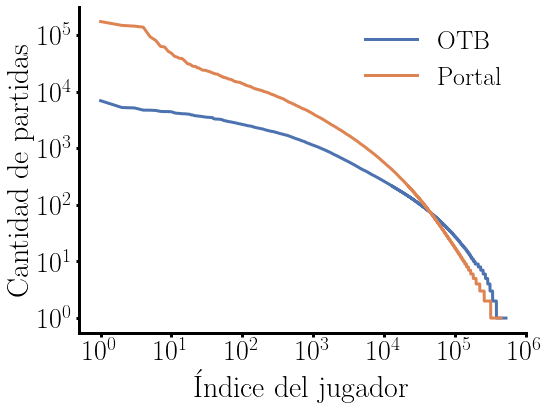

In [36]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax.set_ylabel("Cantidad de partidas")
ax.set_xlabel("Índice del jugador")
ax.set_xscale("log")
ax.set_yscale("log")
for i, (name, df) in enumerate(dfs.items()):
    games_per_player = games_per_player_dict[name]
    Y = games_per_player
    X = np.arange(1, len(Y)+1)
    ax.plot(X, Y, label=name)
ax.set_xlim(0.5, 1e6)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 1e6])
ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
ax.legend(frameon=False)
sns.despine()
plt.show()

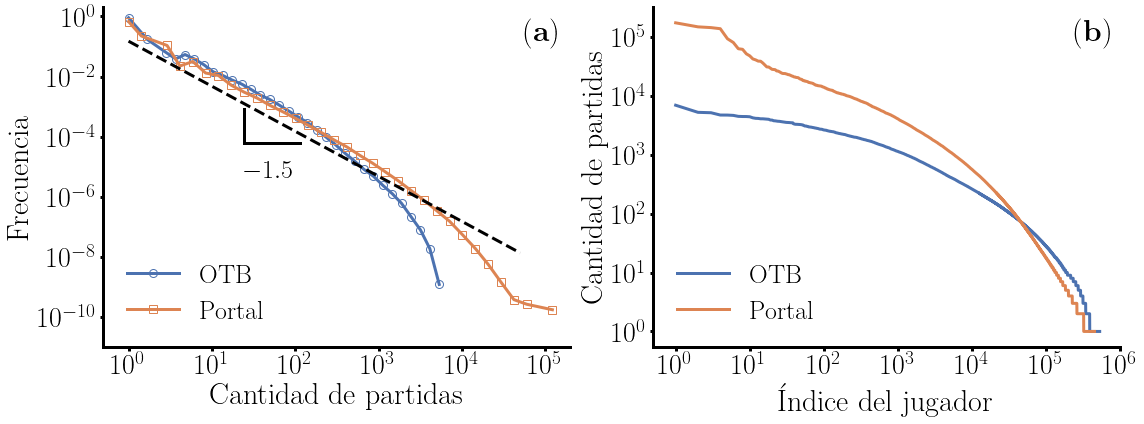

In [79]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes[0]
ax.set_xlim(0.5, 200000)
ax.text(0.9, 0.9, panels[0], fontsize=30, transform=ax.transAxes)
ax.plot([0.3, 0.42], [0.6, 0.6], "-", color="k", transform=ax.transAxes)
ax.plot([0.3, 0.3], [0.6, 0.7], "-", color="k", transform=ax.transAxes)
for i, (name, df) in enumerate(dfs.items()):
    games_per_player = games_per_player_dict[name]
    marker = "o" if name == "OTB" else "s"
    plot_game_distribution(games_per_player, ax=ax, color=f"C{i}", label=name, marker=marker)

X_powerlaw = np.array([1, 50000])
ax.plot(
    X_powerlaw, powerlaw(X_powerlaw, -1.5, 0.15), "--", color="k", zorder=10
)
#ax.text(0.28, 0.5, r"$\gamma = -1.5$", fontsize=26, transform=ax.transAxes)
ax.text(0.3, 0.5, r"$-1.5$", fontsize=26, transform=ax.transAxes)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000])
ax.set_ylim(1e-11, 2)
ax.set_yticks([1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
ax.legend(frameon=False, loc="lower left")


ax = axes[1]
ax.text(0.9, 0.9, panels[1], fontsize=30, transform=ax.transAxes)
ax.set_ylabel("Cantidad de partidas")
ax.set_xlabel("Índice del jugador")
ax.set_xscale("log")
ax.set_yscale("log")
for i, (name, df) in enumerate(dfs.items()):
    games_per_player = games_per_player_dict[name]
    Y = games_per_player
    X = np.arange(1, len(Y)+1)
    ax.plot(X, Y, label=name)
ax.set_xlim(0.5, 1e6)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 1e6])
ax.set_yticks([1, 10, 100, 1000, 10000, 100000])
ax.legend(frameon=False, loc="lower left")

sns.despine()
plt.tight_layout()
plt.savefig(FIGS_DIR / "game_distribution.pdf")
plt.show()